# This files runs the entire calibration pipeline for the pa1 debug-a dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import DataIO as io
import LinAlg as LA

import Debug

In [2]:
calbody_filepath = r'.\PA_1_Data\pa1-debug-a-calbody.txt'
calreadings_filepath = r'.\PA_1_Data\pa1-debug-a-calreadings.txt'
empivot_filepath = r'.\PA_1_Data\pa1-debug-a-empivot.txt'
optpivot_filepath = r'.\PA_1_Data\pa1-debug-a-optpivot.txt'

output_filepath = r'.\PA_1_Data\pa1-debug-a-output1.txt'

# 4.a Compute FD 
the transformation from the optical tracker to the EM tracker \
eg: D_j = FD \cdot d_j

d_i Vectors (Optical Markers on base of EM Tracker, wrt EM tracker):

Vector(0.00, 0.00, 0.00)

Vector(0.00, 0.00, 150.00)

Vector(0.00, 150.00, 0.00)

Vector(0.00, 150.00, 150.00)

Vector(150.00, 0.00, 0.00)

Vector(150.00, 0.00, 150.00)

Vector(150.00, 150.00, 0.00)

Vector(150.00, 150.00, 150.00)

a_i Vectors (Optical Markers on Calibration Object, wrt Calibration Object):
Vector(0.00, 0.00, 0.00)
Vector(0.00, 0.00, 250.00)
Vector(0.00, 250.00, 0.00)
Vector(0.00, 250.00, 250.00)
Vector(250.00, 0.00, 0.00)
Vector(250.00, 0.00, 250.00)
Vector(250.00, 250.00, 0.00)
Vector(250.00, 250.00, 250.00)

c_i Vectors (EM Markers on Calibration Object, wrt Calibration Object):
Vector(0.00, 0.00, 0.00)
Vector(0.00, 0.00, 125.00)
Vector(0.00, 0.00, 250.00)
Vector(0.00, 125.00, 0.00)
Vector(0.00, 125.00, 125.00)
Vector(0.00, 125.00, 250.00)
Vector(0.00, 250.00, 0.00)
Vector(0.00, 250.00, 125.00)
Vector(0.00, 250.00, 250.00)
Vector(125.00, 0.00, 0.00)
Vector(125.00, 0.00, 125.00)
Vector(125.00, 0.00

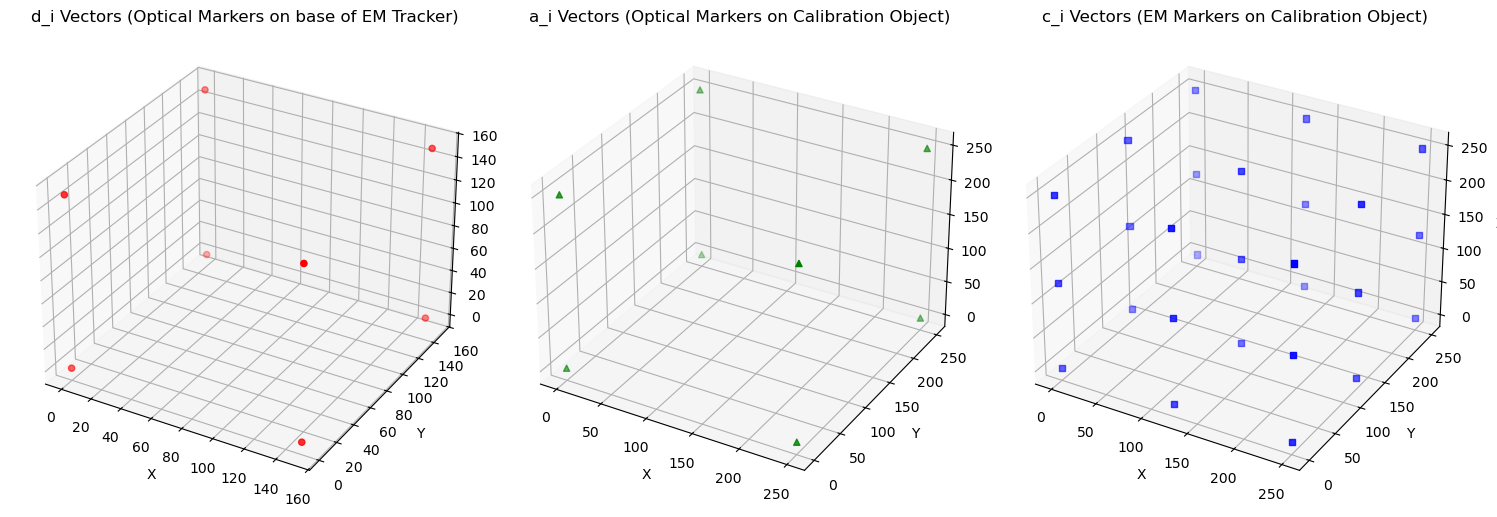

In [3]:
d_vectors, a_vectors, c_vectors, N_D, N_A, N_C = io.read_calbody_file(calbody_filepath)

# Output the vectors
print("d_i Vectors (Optical Markers on base of EM Tracker, wrt EM tracker):")
for vec in d_vectors:
    print()
    print(vec)
assert len(d_vectors) == N_D

print("\na_i Vectors (Optical Markers on Calibration Object, wrt Calibration Object):")
for vec in a_vectors:
    print(vec)
assert len(a_vectors) == N_A

print("\nc_i Vectors (EM Markers on Calibration Object, wrt Calibration Object):")
for vec in c_vectors:
    print(vec)
assert len(c_vectors) == N_C

LA.visualize_vectors(d_vectors, a_vectors, c_vectors)

In [4]:
frames_data = io.read_calreadings_file(calreadings_filepath)

# Output the vectors for each frame
for frame_num, frame_data in frames_data.items():
    print(f"Frame {frame_num}:")

    print("  D_i Vectors (Optical Markers on EM tracker, wrt Optical Tracker):")
    for vec in frame_data['D_vectors']:
        print(f"    {vec}")

    print("  A_i Vectors (Optical Markers on Calibration Object, wrt Optical Tracker ):")
    for vec in frame_data['A_vectors']:
        print(f"    {vec}")

    print("  C_i Vectors (EM Markers on Calibration Object, wrt EM tracker):")
    for vec in frame_data['C_vectors']:
        print(f"    {vec}")

Frame 1:
  D_i Vectors (Optical Markers on EM tracker, wrt Optical Tracker):
    Vector(0.00, 0.00, -1500.00)
    Vector(0.00, 0.00, -1350.00)
    Vector(0.00, 150.00, -1500.00)
    Vector(0.00, 150.00, -1350.00)
    Vector(150.00, 0.00, -1500.00)
    Vector(150.00, 0.00, -1350.00)
    Vector(150.00, 150.00, -1500.00)
    Vector(150.00, 150.00, -1350.00)
  A_i Vectors (Optical Markers on Calibration Object, wrt Optical Tracker ):
    Vector(209.30, 208.87, -1288.97)
    Vector(205.19, 207.84, -1039.00)
    Vector(211.50, 458.85, -1287.91)
    Vector(207.39, 457.83, -1037.95)
    Vector(459.26, 206.65, -1284.87)
    Vector(455.15, 205.63, -1034.91)
    Vector(461.45, 456.64, -1283.81)
    Vector(457.35, 455.62, -1033.85)
  C_i Vectors (EM Markers on Calibration Object, wrt EM tracker):
    Vector(209.30, 208.87, 211.03)
    Vector(207.25, 208.35, 336.01)
    Vector(205.19, 207.84, 461.00)
    Vector(210.40, 333.86, 211.56)
    Vector(208.35, 333.35, 336.54)
    Vector(206.29, 332.84, 46

In [5]:
print("D_1")
for vec in frames_data[1]['D_vectors']:
    print(vec)

print("d_i")
for vec in d_vectors:
    print(vec)

# for frame_num, frame_data in frames_data.items():
    # Debug.plot_original_vs_transformed(d_vectors, frame_data['D_vectors']) 

D_1
Vector(0.00, 0.00, -1500.00)
Vector(0.00, 0.00, -1350.00)
Vector(0.00, 150.00, -1500.00)
Vector(0.00, 150.00, -1350.00)
Vector(150.00, 0.00, -1500.00)
Vector(150.00, 0.00, -1350.00)
Vector(150.00, 150.00, -1500.00)
Vector(150.00, 150.00, -1350.00)
d_i
Vector(0.00, 0.00, 0.00)
Vector(0.00, 0.00, 150.00)
Vector(0.00, 150.00, 0.00)
Vector(0.00, 150.00, 150.00)
Vector(150.00, 0.00, 0.00)
Vector(150.00, 0.00, 150.00)
Vector(150.00, 150.00, 0.00)
Vector(150.00, 150.00, 150.00)


In [6]:
F_D_point_cloud = LA.perform_calibration_registration_for_frames(frames_data, d_vectors, vector_type='D')

rmse_results = {}

# Loop through each frame in the point cloud registration results
for frame_num, frame in F_D_point_cloud.items():
    # Extract the source points (calbody d_vectors) for transformation
    d_points = [LA.Vector(vec.coords[0], vec.coords[1], vec.coords[2]) for vec in d_vectors]  # Source points (d_vectors)

    # Extract the target points (D_points) from calreadings_frames
    D_points = [LA.Vector(vec.coords[0], vec.coords[1], vec.coords[2]) for vec in frames_data[frame_num]['D_vectors']]  # Target points

    # Apply the transformation to d_points
    transformed_d_points = LA.transform_points(frame, d_points)

    # Compute the RMSE between the transformed d_points and D_points
    transformed_array = np.array([v.as_array() for v in transformed_d_points])
    target_array = np.array([v.as_array() for v in D_points])
    rmse = LA.compute_rmse(transformed_array, target_array)
    rmse_results[frame_num] = rmse

    # Output the RMSE result
    print(f"Frame {frame_num} RMSE: {rmse}")
    print(f"Frame {frame_num} Transformation Matrix (R):", frame.rotation)
    print(f"Frame {frame_num} Translation Vector (t):", frame.translation)
    # Plot the transformed d_points vs target D_points
    # LA.plot_3d_transformed_vs_target(frame_num, transformed_d_points, D_points)

Frame 1 RMSE: 0.0
Frame 1 Transformation Matrix (R): [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Frame 1 Translation Vector (t): [    0.     0. -1500.]
Frame 2 RMSE: 0.0
Frame 2 Transformation Matrix (R): [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Frame 2 Translation Vector (t): [    0.     0. -1500.]
Frame 3 RMSE: 0.0
Frame 3 Transformation Matrix (R): [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Frame 3 Translation Vector (t): [    0.     0. -1500.]
Frame 4 RMSE: 0.0
Frame 4 Transformation Matrix (R): [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Frame 4 Translation Vector (t): [    0.     0. -1500.]
Frame 5 RMSE: 0.0
Frame 5 Transformation Matrix (R): [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Frame 5 Translation Vector (t): [    0.     0. -1500.]
Frame 6 RMSE: 0.0
Frame 6 Transformation Matrix (R): [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Frame 6 Translation Vector (t): [    0.     0. -1500.]
Frame 7 RMSE: 0.0
Frame 7 Transformation Matrix (R): [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Frame 7 Translation Vector (t): [    0. 

# 4.b Compute F_A 
Transformation from the optical tracker to calibration object

In [7]:
F_A_point_cloud = LA.perform_calibration_registration_for_frames(frames_data, a_vectors, vector_type='A')

rmse_results = {}

# Loop through each frame in the point cloud registration results
for frame_num, frame in F_A_point_cloud.items():
    # Extract the source points (calbody a_vectors) for transformation
    a_points = [LA.Vector(vec.coords[0], vec.coords[1], vec.coords[2]) for vec in a_vectors]  # Source points (a_vectors)

    # Extract the target points (A_points) from calreadings_frames
    A_points = [LA.Vector(vec.coords[0], vec.coords[1], vec.coords[2]) for vec in frames_data[frame_num]['A_vectors']]  # Target points

    # Apply the transformation to a_points
    transformed_a_points = LA.transform_points(frame, a_points)

    # Compute the RMSE between the transformed a_points and A_points
    transformed_array = np.array([v.as_array() for v in transformed_a_points])
    target_array = np.array([v.as_array() for v in A_points])
    rmse = LA.compute_rmse(transformed_array, target_array)
    rmse_results[frame_num] = rmse

    # Output the RMSE result
    print(f"Frame {frame_num} RMSE: {rmse}")
    print(f"Frame {frame_num} Transformation Matrix (R):", frame.rotation)
    print(f"Frame {frame_num} Translation Vector (t):", frame.translation)
    # Plot the transformed a_points vs target A_points
    # LA.plot_3d_transformed_vs_target(frame_num, transformed_a_points, A_points)

Frame 1 RMSE: 0.0026154008228331804
Frame 1 Transformation Matrix (R): [[ 0.99982644  0.00878584 -0.01642831]
 [-0.00885411  0.99995245 -0.00408762]
 [ 0.01639162  0.00423237  0.99985669]]
Frame 1 Translation Vector (t): [  209.3007572    208.86490927 -1288.96883709]
Frame 2 RMSE: 0.0017889967421069741
Frame 2 Transformation Matrix (R): [[ 0.99978401 -0.01937515  0.00751895]
 [ 0.01940508  0.99980399 -0.00392741]
 [-0.00744138  0.00407247  0.99996402]]
Frame 2 Translation Vector (t): [  208.65152596   210.62979217 -1051.3393803 ]
Frame 3 RMSE: 0.0022094156593084335
Frame 3 Transformation Matrix (R): [[ 0.99973035 -0.02309864 -0.00238233]
 [ 0.02312162  0.99968145  0.01011886]
 [ 0.00214784 -0.01017122  0.99994597]]
Frame 3 Translation Vector (t): [  211.23633108   451.75976586 -1289.5065894 ]
Frame 4 RMSE: 0.0021385112777352333
Frame 4 Transformation Matrix (R): [[ 0.99969751  0.01818196 -0.01656198]
 [-0.01769821  0.99942559  0.02890108]
 [ 0.01707794 -0.02859922  0.99944506]]
Frame 4

# Q6  find dimple and pointer vec

In [8]:
opt_frames_data, N_D, N_H, N_frames  = io.read_optpivot_file(optpivot_filepath)

Visualize data

In [9]:
# Output the vectors for each frame
for frame_num, frame_data in opt_frames_data.items():
    print(f"Frame {frame_num}:")

    print("  D_i Vectors (Optical Markers on EM tracker, wrt Optical Tracker):")
    for vec in frame_data['D_vectors']:
        print(f"    {vec}")

    print("  H_i Vectors (OPT Markers on probe, wrt Optical tracker):")
    for vec in frame_data['H_vectors']:
        print(f"    {vec}")

Frame 1:
  D_i Vectors (Optical Markers on EM tracker, wrt Optical Tracker):
    Vector(0.00, 0.00, -1500.00)
    Vector(0.00, 0.00, -1350.00)
    Vector(0.00, 150.00, -1500.00)
    Vector(0.00, 150.00, -1350.00)
    Vector(150.00, 0.00, -1500.00)
    Vector(150.00, 0.00, -1350.00)
    Vector(150.00, 150.00, -1500.00)
    Vector(150.00, 150.00, -1350.00)
  H_i Vectors (OPT Markers on probe, wrt Optical tracker):
    Vector(394.46, 456.85, -1286.87)
    Vector(411.79, 502.92, -1278.09)
    Vector(429.13, 548.99, -1269.31)
    Vector(441.33, 439.52, -1288.48)
    Vector(458.67, 485.58, -1279.70)
    Vector(476.01, 531.65, -1270.92)
Frame 2:
  D_i Vectors (Optical Markers on EM tracker, wrt Optical Tracker):
    Vector(0.00, 0.00, -1500.00)
    Vector(0.00, 0.00, -1350.00)
    Vector(0.00, 150.00, -1500.00)
    Vector(0.00, 150.00, -1350.00)
    Vector(150.00, 0.00, -1500.00)
    Vector(150.00, 0.00, -1350.00)
    Vector(150.00, 150.00, -1500.00)
    Vector(150.00, 150.00, -1350.00)
  H_i

Find H0

H0 Vectors (Centroids of H_vectors for each frame):
  Frame 1: Vector(435.23, 494.25, -1278.90)
  Frame 2: Vector(446.56, 432.42, -1379.92)
  Frame 3: Vector(458.84, 405.61, -1215.28)
  Frame 4: Vector(465.71, 388.82, -1371.15)
  Frame 5: Vector(433.86, 450.57, -1377.35)
  Frame 6: Vector(445.29, 470.54, -1238.88)
  Frame 7: Vector(440.33, 481.04, -1249.67)
  Frame 8: Vector(497.80, 394.06, -1318.32)
  Frame 9: Vector(355.78, 477.43, -1344.66)
  Frame 10: Vector(361.63, 365.44, -1380.96)
  Frame 11: Vector(440.95, 484.29, -1336.65)
  Frame 12: Vector(300.84, 400.14, -1289.10)


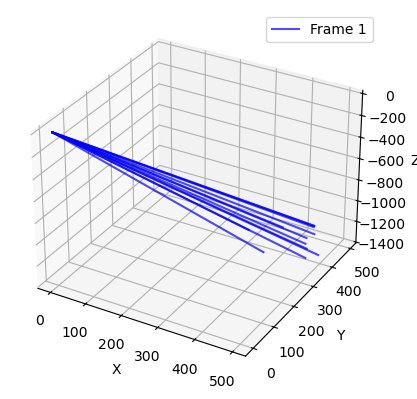

In [10]:
H0_vectors = LA.compute_centroid_vectors(opt_frames_data, vector_type='H')

print("H0 Vectors (Centroids of H_vectors for each frame):")
for idx, vec in enumerate(H0_vectors):
    print(f"  Frame {idx + 1}: {vec}")


Debug.visualize_H0_vectors(H0_vectors)


Find h_i for each frame

In [11]:
hi_vectors = LA.compute_local_marker_vectors(opt_frames_data, H0_vectors, vector_type='H')
    
for frame_num in hi_vectors.keys():
    print(f"Frame {frame_num}:")

    print("  h_i Vectors (OPT Markers on probe, wrt Probe):")
    for vec in hi_vectors[frame_num]:
        print(f"    {vec}")

Frame 1:
  h_i Vectors (OPT Markers on probe, wrt Probe):
    Vector(-40.77, -37.40, -7.97)
    Vector(-23.44, 8.67, 0.81)
    Vector(-6.10, 54.74, 9.58)
    Vector(6.10, -54.73, -9.58)
    Vector(23.44, -8.67, -0.80)
    Vector(40.78, 37.40, 7.97)
Frame 2:
  h_i Vectors (OPT Markers on probe, wrt Probe):
    Vector(-37.21, -30.70, 28.26)
    Vector(-14.20, -15.55, -13.47)
    Vector(8.80, -0.40, -55.20)
    Vector(-8.81, 0.40, 55.20)
    Vector(14.20, 15.55, 13.47)
    Vector(37.20, 30.70, -28.26)
Frame 3:
  h_i Vectors (OPT Markers on probe, wrt Probe):
    Vector(-41.57, 18.40, -32.54)
    Vector(-12.42, 20.15, 8.05)
    Vector(16.72, 21.90, 48.64)
    Vector(-16.72, -21.89, -48.64)
    Vector(12.42, -20.14, -8.05)
    Vector(41.56, -18.39, 32.54)
Frame 4:
  h_i Vectors (OPT Markers on probe, wrt Probe):
    Vector(-38.90, 28.90, 27.87)
    Vector(-6.32, 22.26, -9.47)
    Vector(26.25, 15.61, -46.82)
    Vector(-26.26, -15.60, 46.82)
    Vector(6.32, -22.25, 9.48)
    Vector(38.90, 

Get new F_D

In [12]:
F_D_opt_point_cloud = LA.perform_calibration_registration_for_frames(opt_frames_data, d_vectors, vector_type='D')

rmse_results = {}

# Loop through each frame in the point cloud registration results
for frame_num, frame in F_D_opt_point_cloud.items():
    # Extract the source points (calbody d_vectors) for transformation
    d_points = [LA.Vector(vec.coords[0], vec.coords[1], vec.coords[2]) for vec in d_vectors]  # Source points (d_vectors)

    # Extract the target points (D_points) from calreadings_frames
    D_points = [LA.Vector(vec.coords[0], vec.coords[1], vec.coords[2]) for vec in opt_frames_data [frame_num]['D_vectors']]  # Target points

    # Apply the transformation to d_points
    transformed_d_points = LA.transform_points(frame, d_points)

    # Compute the RMSE between the transformed d_points and D_points
    transformed_array = np.array([v.as_array() for v in transformed_d_points])
    target_array = np.array([v.as_array() for v in D_points])
    rmse = LA.compute_rmse(transformed_array, target_array)
    rmse_results[frame_num] = rmse

    # Output the RMSE result
    print(f"Frame {frame_num} RMSE: {rmse}")
    print(f"Frame {frame_num} Transformation Matrix (R): \n", frame.rotation)
    print(f"Frame {frame_num} Translation Vector (t): \n", frame.translation)
    # Plot the transformed d_points vs target D_points
    # LA.plot_3d_transformed_vs_target(frame_num, transformed_d_points, D_points)

Frame 1 RMSE: 0.0
Frame 1 Transformation Matrix (R): 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Frame 1 Translation Vector (t): 
 [    0.     0. -1500.]
Frame 2 RMSE: 0.0
Frame 2 Transformation Matrix (R): 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Frame 2 Translation Vector (t): 
 [    0.     0. -1500.]
Frame 3 RMSE: 0.0
Frame 3 Transformation Matrix (R): 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Frame 3 Translation Vector (t): 
 [    0.     0. -1500.]
Frame 4 RMSE: 0.0
Frame 4 Transformation Matrix (R): 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Frame 4 Translation Vector (t): 
 [    0.     0. -1500.]
Frame 5 RMSE: 0.0
Frame 5 Transformation Matrix (R): 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Frame 5 Translation Vector (t): 
 [    0.     0. -1500.]
Frame 6 RMSE: 0.0
Frame 6 Transformation Matrix (R): 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Frame 6 Translation Vector (t): 
 [    0.     0. -1500.]
Frame 7 RMSE: 0.0
Frame 7 Transformation Matrix (R): 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Frame 7 Transl

Calculate F_H

In [13]:
F_H_opt_point_cloud = LA.perform_pivot_registration_for_frames(opt_frames_data, hi_vectors, vector_type='H')

rmse_results = {}

# Loop through each frame in the point cloud registration results
for frame_num, frame in F_H_opt_point_cloud.items():
    # Extract the source points (calbody hi_vectors) for transformation
    hi_points = [LA.Vector(vec.coords[0], vec.coords[1], vec.coords[2]) for vec in hi_vectors[frame_num]]

    # Extract the target points (H_points) from calreadings_frames
    H_points = [LA.Vector(vec.coords[0], vec.coords[1], vec.coords[2]) for vec in opt_frames_data [frame_num]['H_vectors']]  # Target points

    # Apply the transformation to hi_points
    transformed_h_points = LA.transform_points(frame, hi_points)

    # Compute the RMSE between the transformed hi_points and H_points
    transformed_array = np.array([v.as_array() for v in transformed_h_points])
    target_array = np.array([v.as_array() for v in H_points])
    rmse = LA.compute_rmse(transformed_array, target_array)
    rmse_results[frame_num] = rmse

    # Output the RMSE result
    print(f"Frame {frame_num} RMSE: {rmse}")
    print(f"Frame {frame_num} Transformation Matrix (R): \n", frame.rotation)
    print(f"Frame {frame_num} Translation Vector (t): \n", frame.translation)
    # Plot the transformed d_points vs target H_points
    H_points.append(LA.Vector(H0_vectors[frame_num-1].coords[0], H0_vectors[frame_num-1].coords[1], H0_vectors[frame_num-1].coords[2]))

    # LA.plot_3d_transformed_vs_target(frame_num, transformed_h_points, H_points)

Frame 1 RMSE: 0.0
Frame 1 Transformation Matrix (R): 
 [[ 1.00000000e+00 -3.64439223e-23  2.81519592e-23]
 [ 3.64439223e-23  1.00000000e+00 -1.40059792e-23]
 [-2.81519592e-23  1.40059792e-23  1.00000000e+00]]
Frame 1 Translation Vector (t): 
 [  435.23165894   494.25170898 -1278.89501953]
Frame 2 RMSE: 0.0
Frame 2 Transformation Matrix (R): 
 [[ 1.00000000e+00 -1.13441682e-22 -7.49269933e-23]
 [ 1.13441682e-22  1.00000000e+00 -2.99004789e-23]
 [ 7.49269933e-23  2.99004789e-23  1.00000000e+00]]
Frame 2 Translation Vector (t): 
 [  446.55667114   432.42001343 -1379.91992188]
Frame 3 RMSE: 0.0
Frame 3 Transformation Matrix (R): 
 [[ 1.00000000e+00  3.77534844e-22 -1.22930782e-22]
 [-3.77534844e-22  1.00000000e+00  1.71174284e-22]
 [ 1.22930782e-22 -1.71174284e-22  1.00000000e+00]]
Frame 3 Translation Vector (t): 
 [  458.83828735   405.61499023 -1215.27990723]
Frame 4 RMSE: 0.0
Frame 4 Transformation Matrix (R): 
 [[ 1.00000000e+00 -1.92825373e-23 -6.68103592e-23]
 [ 1.92825373e-23  1.000

In [14]:
F_D_inv = {}

for frame_num in F_D_opt_point_cloud:
    frame_D_inv = F_D_opt_point_cloud[frame_num].inv()
    F_D_inv[frame_num] = frame_D_inv

F_DH_opt_point_cloud = LA.combine_point_cloud_frames(F_D_inv, F_H_opt_point_cloud)

t_H, p_dimple_H = LA.solve_for_pointer_and_dimple(F_DH_opt_point_cloud)

print(t_H)
print(p_dimple_H)

[[211.78409322]
 [218.5262502 ]
 [ 92.46612549]]
[[-211.78409322]
 [-218.5262502 ]
 [ -92.46612549]]


In [23]:
t_H_transformed =[]
for frame_num, frame in F_DH_opt_point_cloud.items():
    t_H_transformed.append(frame @ LA.Vector(t_H.flatten()[0], t_H.flatten()[1], t_H.flatten()[2]))

for item in t_H_transformed:
    print(item)

Vector(647.02, 712.78, 313.57)
Vector(658.34, 650.95, 212.55)
Vector(670.62, 624.14, 377.19)
Vector(677.49, 607.35, 221.32)
Vector(645.65, 669.10, 215.12)
Vector(657.07, 689.07, 353.59)
Vector(652.11, 699.56, 342.80)
Vector(709.58, 612.58, 274.15)
Vector(567.57, 695.96, 247.81)
Vector(573.41, 583.97, 211.51)
Vector(652.73, 702.82, 255.82)
Vector(512.63, 618.67, 303.37)


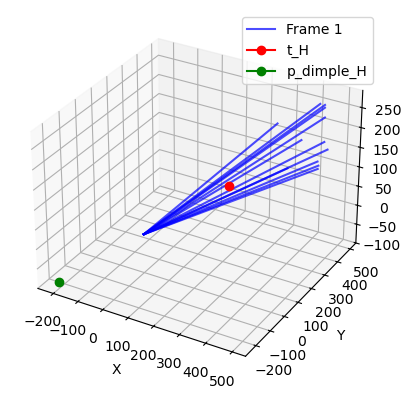

In [15]:
H0_transformed =[]
for frame_num, frame in F_D_inv.items():
    H0_transformed.append(frame @ H0_vectors[frame_num - 1])


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Origin point (0, 0, 0) for all vectors
origin = np.array([0, 0, 0])

# Plot each vector from the origin to the point defined by the vector
for idx, vec in enumerate(H0_transformed):
    vec_array = vec.as_array()
    ax.plot([origin[0], vec_array[0]], [origin[1], vec_array[1]], [origin[2], vec_array[2]], color='b', alpha=0.7, label=f"Frame {idx + 1}" if idx == 0 else "")

ax.plot(t_H[0], t_H[1], t_H[2], marker='o', color='r', label='t_H')
ax.plot(p_dimple_H[0], p_dimple_H[1], p_dimple_H[2], marker='o', color='g', label='p_dimple_H')
    
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.legend()
plt.show()
